In [1]:
import sys

sys.path.append('src/')

import loading
import preprocessing

In [2]:
df = loading.load_data()

mutations_d77_localized.csv
mutations_d94_localized.csv
mutations_d93_localized.csv
.DS_Store
mutations_d78_localized.csv
mutations_d92_localized.csv
mutations_d75_localized.csv
mutations_d95_localized.csv
mutations_d91_localized.csv


In [3]:
df_sell, df_buy = preprocessing.filter_dataset(df)

/Users/alexis_violeau/Desktop/HEC/Augmented Proposal - Challenge Eleven/src/preprocessing.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell['valm2'] = df_sell.valeurfonc/df_sell.sbatapt
/Users/alexis_violeau/Desktop/HEC/Augmented Proposal - Challenge Eleven/src/preprocessing.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_buy['valm2'] = df_buy.valeurfonc/df_buy.sterr
/Users/alexis_violeau/Desktop/HEC/Augmented Proposal - Challenge Eleven/src/preprocessing.py:39: SettingWithCopyWarning: 
A

In [4]:
df_sell

,anneemut,moismut,coddep,l_codinsee,latitude,longitude,nblot,valm2,rooms
0,2017,12,77,77131,48.807846,3.088145,2,3244.897959,2
1,2018,6,77,77330,48.932906,2.886263,2,3266.545455,3
2,2017,2,77,77326,48.577792,2.559852,2,4186.842105,1
3,2014,7,77,77152,48.520764,2.626232,4,2345.679012,4
4,2015,9,77,77284,48.960648,2.883236,2,4486.363636,2
...,...,...,...,...,...,...,...,...,...
19180,2015,1,91,91521,48.656879,2.418144,2,3595.081967,3
19181,2015,6,91,91027,48.702511,2.359260,2,3312.500000,4
19182,2017,9,91,91692,48.676388,2.176709,2,3930.232558,2
19183,2018,11,91,91047,48.487806,2.351496,2,3523.809524,2


In [5]:
df_sell['valm2'].hist(bins = 100)
plt.show()

NameError: name 'plt' is not defined

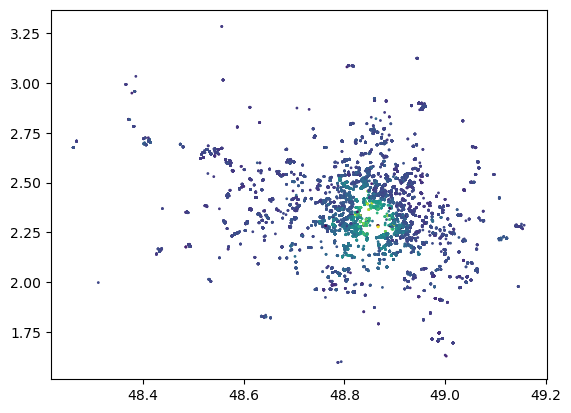

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_sell['latitude'],df_sell['longitude'],c = df_sell['valm2'],s=1)
plt.show()

In [6]:
df_sell['date'] = df_sell['anneemut'] + df_sell['moismut']/12

In [7]:
X = df_sell[['date','latitude','longitude','nblot','rooms']]
y = df_sell['valm2']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7)

In [8]:
from sklearn.ensemble import RandomForestRegressor

gb = RandomForestRegressor(n_estimators = 1000)

gb.fit(X_train,y_train)
gb.score(X_test,y_test)

0.8649761119522258

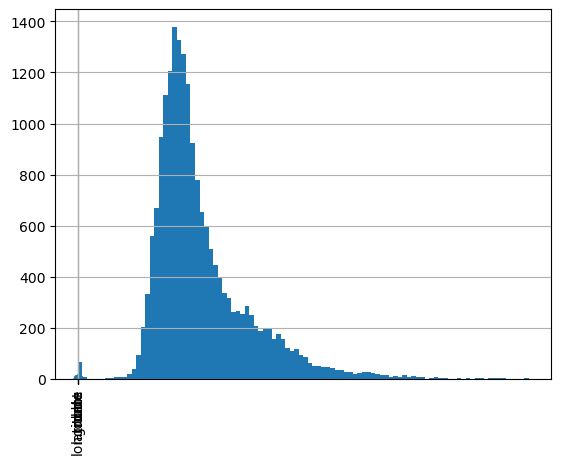

In [9]:
import matplotlib.pyplot as plt

plt.scatter(range(len(gb.feature_importances_)),gb.feature_importances_)
plt.xticks(range(len(gb.feature_importances_)),X_train.columns,rotation = 90)
plt.grid(True)
plt.show()

In [10]:
## PDP


import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from sklearn.inspection import partial_dependence

@interact

def pdp(feature = X_train.columns):
    plt.figure()
    pdp = partial_dependence(gb, X_train, feature, kind = 'average')
    plt.title('Partial Dependence plot for ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Partial Dependence')
    plt.plot(pdp['values'][0],pdp['average'][0])
    plt.show()

interactive(children=(Dropdown(description='feature', options=('date', 'latitude', 'longitude', 'nblot', 'room…

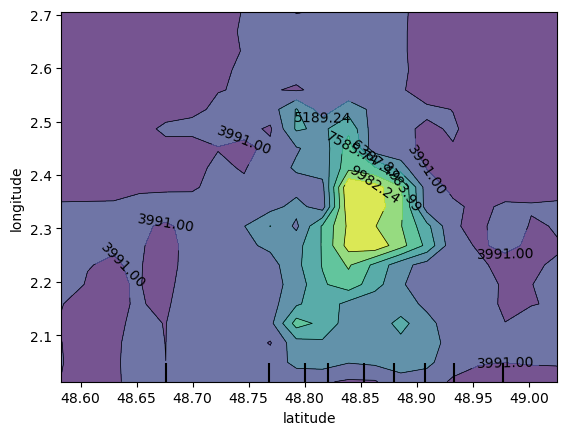

In [11]:
from sklearn.inspection import PartialDependenceDisplay

display = PartialDependenceDisplay.from_estimator(
    gb,
    X_train,
    [('latitude','longitude')],
    kind="average",
    n_jobs=2,
    grid_resolution=20,
)
plt.show()